In [1]:
##### A1 #####
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
file_path = "Machine_Learning_Dataset.csv"
data = pd.read_csv(file_path)

# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classification model (Random Forest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = model.predict(X_train)

# Predictions on test data
y_test_pred = model.predict(X_test)

# Evaluate on training data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Evaluate on test data
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print results
print("Training Confusion Matrix:")
print(train_conf_matrix)
print("\nTraining Classification Report:")
print(train_classification_report)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)
print("\nTest Classification Report:")
print(test_classification_report)

# Analysis for overfitting/underfitting:
def analyze_model(train_report, test_report):
    print("\n--- Model Analysis ---")
    train_f1 = float(train_report.split()[-2])
    test_f1 = float(test_report.split()[-2])
    
    if test_f1 < train_f1 and test_f1 < 0.6:
        print("Model is likely underfitting the data.")
    elif test_f1 < train_f1:
        print("Model might be overfitting the data.")
    else:
        print("Model seems to be fitting well (regular fit).")

analyze_model(train_classification_report, test_classification_report)


Training Confusion Matrix:
[[822   0]
 [  0 809]]

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       822
           1       1.00      1.00      1.00       809

    accuracy                           1.00      1631
   macro avg       1.00      1.00      1.00      1631
weighted avg       1.00      1.00      1.00      1631


Test Confusion Matrix:
[[322  30]
 [ 55 293]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       352
           1       0.91      0.84      0.87       348

    accuracy                           0.88       700
   macro avg       0.88      0.88      0.88       700
weighted avg       0.88      0.88      0.88       700


--- Model Analysis ---
Model might be overfitting the data.


In [3]:
####### A2 #########
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Load the Excel file
file_path = 'Lab Session Data.xlsx'
df1 = pd.read_excel(file_path)

# Assuming the sheet contains columns 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)'
X = df1[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
y = df1['Payment (Rs)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"R2 Score: {r2:.4f}")


MSE: 0.00
RMSE: 0.00
MAPE: 0.00%
R2 Score: 1.0000


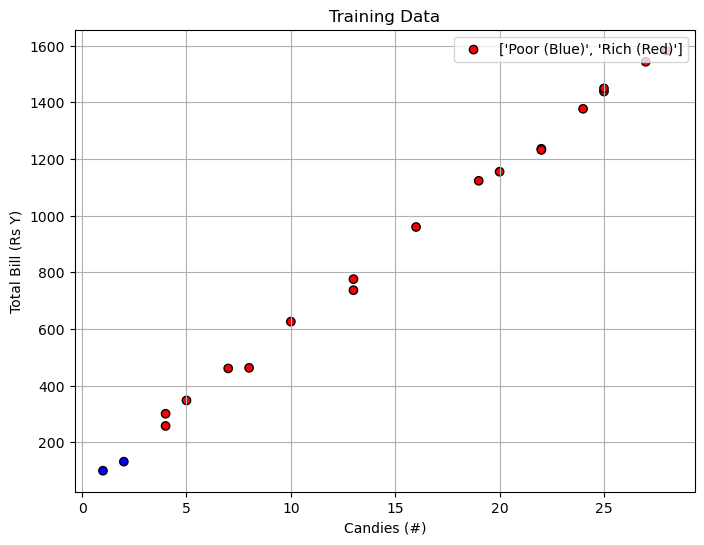

In [4]:
#A3 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Set random seed for reproducibility
np.random.seed(0)

# Given unit prices
price_candies = 55
price_mangoes = 1
price_milk_packets = 18

# Function to calculate total bill and classify as 'rich' or 'poor'
def calculate_total_bill(X1, X2, X3):
    return X1 * price_candies + X2 * price_mangoes + X3 * price_milk_packets

# Task A3: Generate Training Data
n_points = 20
X1_train = np.random.randint(1, 30, size=n_points)  # Candies (#)
X2_train = np.random.randint(1, 10, size=n_points)  # Mangoes (Kg)
X3_train = np.random.randint(1, 5, size=n_points)   # Milk Packets (#)
Y_train = calculate_total_bill(X1_train, X2_train, X3_train)
y_train = np.where(Y_train > 200, 1, 0)  # 1 for 'rich' (Y > 200), 0 for 'poor' (Y <= 200)

# Plot training data
colors = np.where(y_train == 0, 'blue', 'red')
plt.figure(figsize=(8, 6))
plt.scatter(X1_train, Y_train, c=colors, marker='o', edgecolors='k', label=['Poor (Blue)', 'Rich (Red)'])
plt.title('Training Data')
plt.xlabel('Candies (#)')
plt.ylabel('Total Bill (Rs Y)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

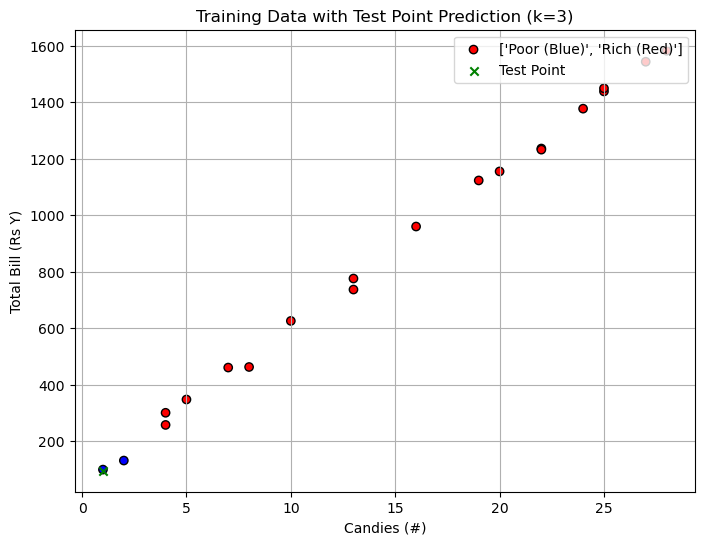

Test point is classified as Poor (Blue)


In [5]:
#A4 

from sklearn.neighbors import KNeighborsClassifier


X1_test = np.random.randint(1, 30)   
X2_test = np.random.randint(1, 10)   
X3_test = np.random.randint(1, 5)    
Y_test = calculate_total_bill(X1_test, X2_test, X3_test)
test_point = np.array([[X1_test, X2_test, X3_test]])

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
X_train_full = np.column_stack((X1_train, X2_train, X3_train))
knn.fit(X_train_full, y_train)

y_pred = knn.predict(test_point)

plt.figure(figsize=(8, 6))
plt.scatter(X1_train, Y_train, c=colors, marker='o', edgecolors='k', label=['Poor (Blue)', 'Rich (Red)'])
plt.scatter(X1_test, Y_test, c='green', marker='x', label='Test Point')
plt.title(f'Training Data with Test Point Prediction (k={k})')
plt.xlabel('Candies (#)')
plt.ylabel('Total Bill (Rs Y)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

if y_pred == 0:
    print(f'Test point is classified as Poor (Blue)')
else:
    print(f'Test point is classified as Rich (Red)')

In [6]:
#A5 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare the training data
data = {
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'ANV': [1, 1, 1, 0, 1, 0, 0, 0, 0, 0]  # Assuming ANV is a binary classification column
}

df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df[['Candies', 'Mangoes']].values
y = df['ANV'].values  # Assuming 'ANV' is the target variable for classification

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# List of k values to evaluate
k_values = [1, 3, 5, 7, 9]

# Loop through each k value, train the model, and calculate metrics
results = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)
    
    results.append({
        'k': k,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Print the results
print("k | Accuracy | Precision | Recall | F1 Score")
print("--|----------|-----------|--------|----------")
for result in results:
    print(f"{result['k']} | {result['accuracy']:.2f}     | {result['precision']:.2f}     | {result['recall']:.2f}  | {result['f1_score']:.2f}")




k | Accuracy | Precision | Recall | F1 Score
--|----------|-----------|--------|----------
1 | 1.00     | 1.00     | 1.00  | 1.00
3 | 0.90     | 1.00     | 0.75  | 0.86
5 | 0.90     | 1.00     | 0.75  | 0.86
7 | 0.80     | 1.00     | 0.50  | 0.67
9 | 0.60     | 0.00     | 0.00  | 0.00


In [8]:
#A7
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "Machine_Learning_Dataset.csv"
data = pd.read_csv(file_path)

# Assume the last column is the target and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV or RandomizedSearchCV
param_grid = {'n_neighbors': list(range(1, 31))}

# Option 1: Use GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_k_grid = grid_search.best_params_['n_neighbors']

# Option 2: Use RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
best_k_random = random_search.best_params_['n_neighbors']

# Evaluate the best models on the test set
knn_best_grid = KNeighborsClassifier(n_neighbors=best_k_grid)
knn_best_grid.fit(X_train, y_train)
y_pred_grid = knn_best_grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)

knn_best_random = KNeighborsClassifier(n_neighbors=best_k_random)
knn_best_random.fit(X_train, y_train)
y_pred_random = knn_best_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)

print(f"Best k value from GridSearchCV: {best_k_grid} with accuracy: {accuracy_grid:.4f}")
print(f"Best k value from RandomizedSearchCV: {best_k_random} with accuracy: {accuracy_random:.4f}")


Best k value from GridSearchCV: 24 with accuracy: 0.8857
Best k value from RandomizedSearchCV: 24 with accuracy: 0.8857
